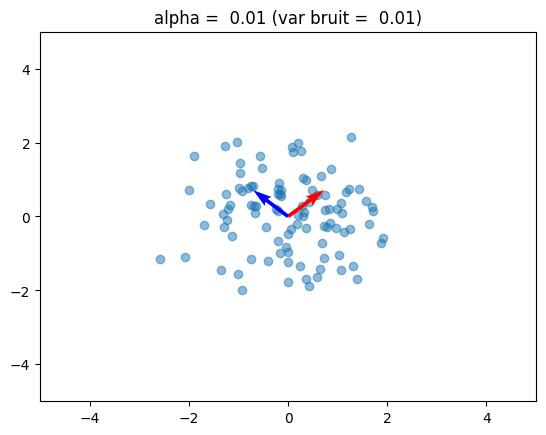

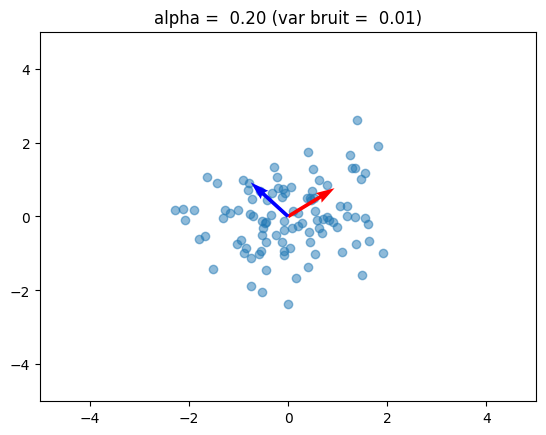

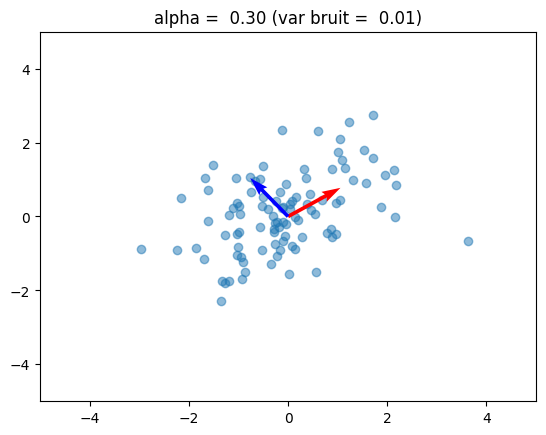

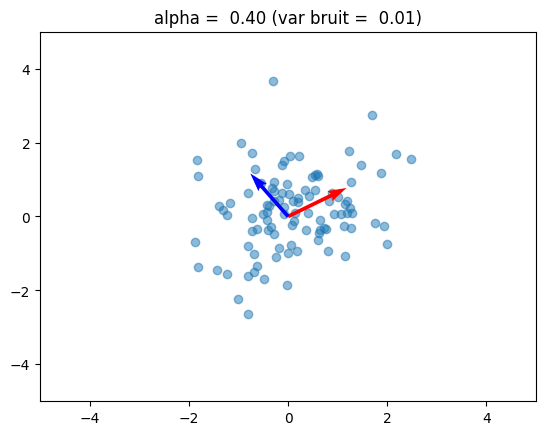

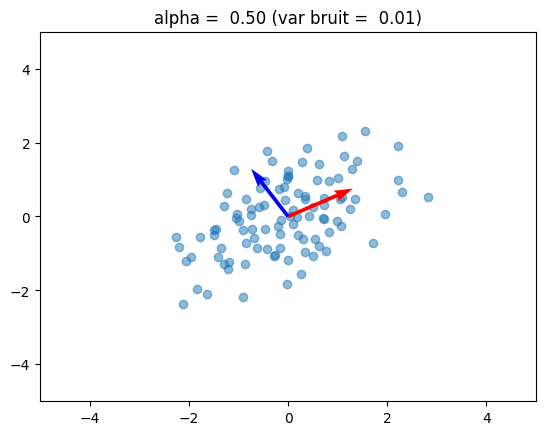

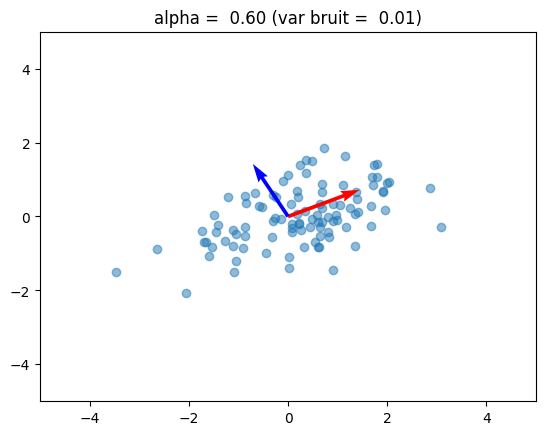

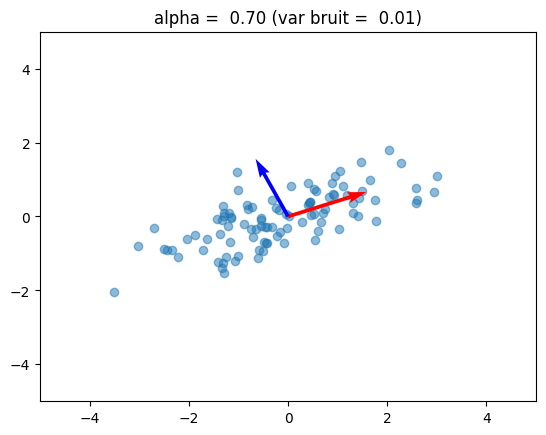

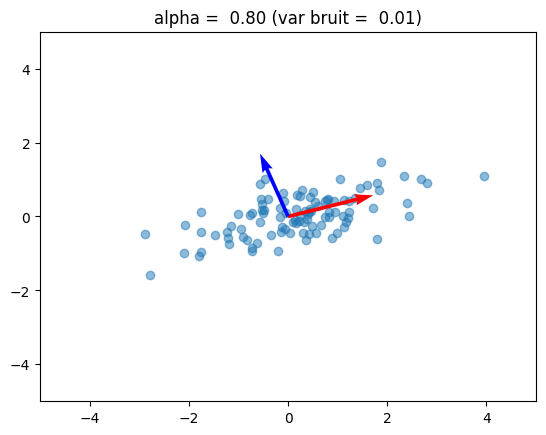

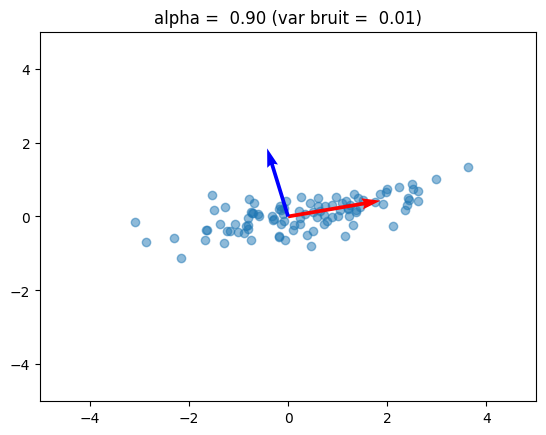

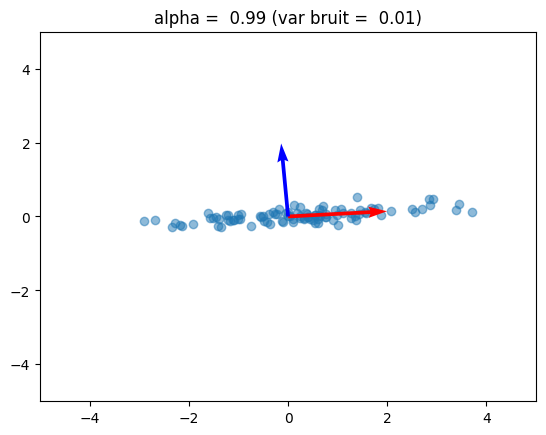

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 

n=100 

sign = 0.1 
alphas = np.array([0.01, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
As = [np.array([[1, alpha], [0, np.sqrt(1 - alpha**2)]]) for alpha in alphas]
for i in range(len(alphas)) : 
    z = np.random.standard_normal((2, n))
    X = As[i] @ z + sign * np.random.standard_normal((2, n))
    lamb1 = 1+sign**2 + alphas[i] 
    lamb2 = 1-sign**2 + alphas[i] 

    v1 = (1/np.sqrt(2*(1-alphas[i])))*np.array([np.sqrt(1-alphas[i]**2), 1-alphas[i]])
    v2 = (1/np.sqrt(2*(1+alphas[i])))*np.array([-np.sqrt(1-alphas[i]**2), 1+alphas[i]])
                                               
    plt.title("alpha = %5.2f (var bruit = %5.2f)" %(alphas[i],sign**2))
    plt.scatter(X[0, :], X[1, :], alpha=0.5)
    plt.quiver(0,0, v1[0],v1[1], angles = 'xy',scale_units = 'xy', color=['r'], scale = 1/lamb1)
    plt.quiver(0,0, v2[0],v2[1], angles ="xy",scale_units="xy",color=["b"],scale= 1/lamb2 )
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show()




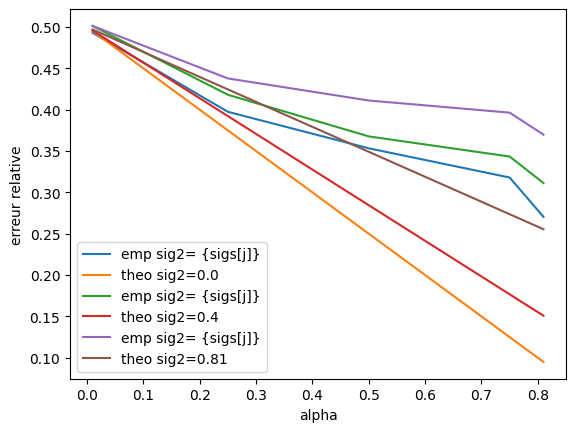

In [68]:
from numpy.linalg import qr

n= int(1e4)
p = 2 
# Données
sigs = np.array([0, 0.4, 0.81])
alphas = np.array([0.01, 0.25, 0.5, 0.75, 0.81])

# Initialisation des matrices
toterr = np.zeros((len(alphas), len(sigs)))
toterr_theo = np.zeros((len(alphas), len(sigs)))

# Boucles pour calculer les erreurs
for i in range(len(alphas)):
    for j in range(len(sigs)):
        # Génération de Z
        Z = np.random.standard_normal((2,n))
        # Calcul de X
        X = As[i] @ Z + sigs[j] * np.random.standard_normal((p,n))
        v1 = (1/np.sqrt(2*(1-alphas[i])))*np.array([np.sqrt(1-alphas[i]**2), 1-alphas[i]])
        px = v1.T @ X

        toterr[i, j] = 1 -  np.linalg.norm(px)**2 / np.linalg.norm(X, ord='fro')**2
        toterr_theo[i, j] = 1 -(1+ sigs[j]**2 + alphas[i]) / (2 +2*sigs[j]**2) 

# Tracé des graphiques
for j in range(len(sigs)):
    plt.plot(alphas, toterr[:, j], label= 'emp sig2= {sigs[j]}')
    plt.plot(alphas, toterr_theo[:, j], label=f'theo sig2={sigs[j]}')

plt.xlabel('alpha')
plt.ylabel('erreur relative')
plt.legend()
plt.show()


[-1.39552053e+04 -3.59331519e+04 -1.54647521e+04 -5.12278125e+03
 -2.59181559e+05 -1.99859996e+04 -2.63458403e+04 -1.02217863e+04
 -5.37184201e+06 -8.66169571e+03]
[0.495 0.4   0.35  0.3   0.25  0.2   0.15  0.1   0.05  0.005]


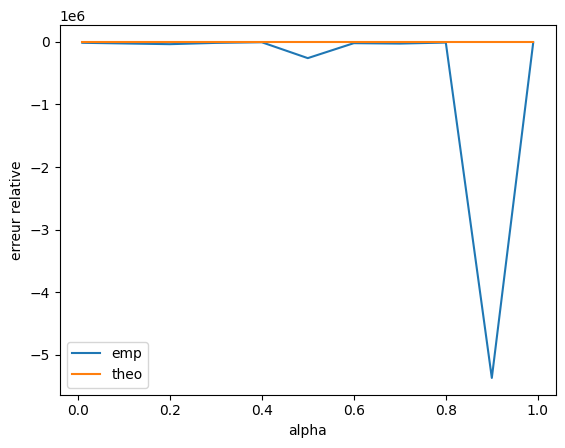

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Données
sign = 0.1
alphas = np.array([0.01, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
As = [np.array([[1, alpha], [0, np.sqrt(1 - alpha**2)]]) for alpha in alphas]
p = 2
Q = np.random.standard_normal((p, 2))
Q, R = np.linalg.qr(np.random.standard_normal((p, 2)))
Q = Q [:,0:2]


# Initialisation des matrices
toterr = np.zeros(len(alphas))
toterr_theo = np.zeros(len(alphas))

# Boucle pour calculer les erreurs
for i in range(len(alphas)):
    # Génération de Z
    Z = np.random.standard_normal((2, 1))
    # Calcul de X
    x = Q @ As[i] @ Z + sign * np.random.standard_normal((p, 1))
    AA  = Q @ As[i]
    # Calcul des erreurs
    lamb, U = np.linalg.eig(AA @ AA.T)
    px = U[:,0].T @ X
    toterr[i] = 1 - np.linalg.norm(px) ** 2 / np.linalg.norm(x, ord="fro")**2
    toterr_theo[i] = 1-(1 + alphas[i])/ 2

# Affichage des résultats
print(toterr)
print(toterr_theo)

# Tracé du graphique
plt.plot(alphas, toterr, label='emp')
plt.plot(alphas, toterr_theo, label='theo')
plt.xlabel('alpha')
plt.ylabel('erreur relative')
plt.legend()
plt.show()
